Modélisation textuelle : veille technique
=========================================

Proof of Concept (POC) d’une technique de modélisation récente. 

**Mission :**
- Réaliser un état de l’art sur une technique récente de modélisation de données texte ou de données image, l’analyser, la tester et la comparer à une approche plus classique que tu as réalisée précédemment ?

**Les attendus :**
- L’état de l’art devra concerner une technique datant de moins de 5 ans, présentée dans un article.
- La technique doit être référencée sur des sites de recherche (Arxiv), des sites connus (par exemple fastml, machine learning mastery, kdnuggets, import AI, MIT tech review, MIT news ML) ou des newsletters de qualité comme data elixir et data science weekly.
- Réaliser une preuve de concept qui met en oeuvre cette nouvelle technique avec les données texte ou image déjà exploitées précédemment ou avec un nouveau dataset.
- Expliquer les concepts et techniques dans une note méthodologique et lors d’une présentation.

**Auteur:** *Jean EMIDIO*

***Fine-tunning et étude comparative des modèles BERT, RoBERTa, ALBERT, CamemBERT***

Le modèle CamemBERT est un modèle de langage à l’état de l’art pour la modélisation de la langue française.

Il s’agit d’un modèle RoBERTa entrainé sur un grand nombre de texte en français et qui peut-être aisément adapté à un grand nombre de tâche grâce au fine-tuning.

**Objectif :**
- Utilisation d'un dataset francais de catégories d'émotions
- Comparaison des 4 modèles suivants : BERT, RoBERTa, ALBERT, CamemBERT

**Modèles étudiés :**

**BERT**
- BERT (Bidirectional Encoder Representations from Transformers) a été présenté pour la première fois en octobre 2018 par des chercheurs de Google AI et publié open-source.

**RoBERTa**
- RoBERTa (Robustly Optimized BERT Pretraining Approach) est une amélioration de BERT publiée par Facebook AI en 2019 (quelques mois après BERT).

**ALBERT**
- ALBERT (A Lite BERT) a été introduit par Google Research (avec Toyota Technological Institute at Chicago) dans un article publié sur arXiv en septembre 2019 et présenté comme conférence à ICLR 2020. 

**CamemBERT**
- CamemBERT, modèle dérivé de RoBERTa pour le français, a été lancé en novembre 2019 par Facebook AI Research en partenariat avec l’Inria. 

**Références des articlés publiés sur arXiv :**

**BERT**
- Titre de l’article : BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding
- Auteurs : Jacob Devlin, Ming-Wei Chang, Kenton Lee, Kristina Toutanova
- Publié sur arXiv : 11 octobre 2018 (arXiv:1810.04805)
- Lien : https://arxiv.org/abs/1810.04805

**RoBERTa**
- Titre de l’article : RoBERTa: A Robustly Optimized BERT Pretraining Approach
- Auteurs : Yinhan Liu, Myle Ott, Naman Goyal, Jingfei Du, Mandar Joshi, Danqi Chen, Omer Levy, Mike Lewis, Luke Zettlemoyer, Veselin Stoyanov
- Publié sur arXiv : 26 juillet 2019 (arXiv:1907.11692) 
- Lien : https://arxiv.org/abs/1907.11692

**ALBERT**
- Titre de l’article : ALBERT: A Lite BERT for Self-supervised Learning of Language Representations
- Auteurs : Zhenzhong Lan, Mingda Chen, Sebastian Goodman, Kevin Gimpel, Piyush Sharma, Radu Soricut
- Publié sur arXiv : 26 septembre 2019 (arXiv:1909.11942) 
- Lien : https://arxiv.org/abs/1909.11942

**CamemBERT**
- Titre de l’article : CamemBERT: a Tasty French Language Model
- Auteurs : Louis Martin, Benjamin Muller, Pedro Javier Ortiz Suárez, Yoann Dupont, Laurent Romary, Éric Villemonte de la Clérgerie, Djamé Seddah, et al.
- Publié dans les actes de ACL 2020 (procédures de l’ACL) — version publiée fin 2019 / début 2020. 
- Lien : https://aclanthology.org/2020.acl-main.645.pdf

Etude basée sur le notebook "Fine Tuning Roberta for Sentiment Analysis" : https://colab.research.google.com/github/DhavalTaunk08/NLP_scripts/blob/master/sentiment_analysis_using_roberta.ipynb#scrollTo=nvXxpfNCGER2

**Table of contents**<a id='toc0_'></a>    
- [1) Les datas](#toc1_)    
  - [Import](#toc1_1_)    
  - [Initialisations](#toc1_2_)    
  - [Fonctions](#toc1_3_)    
  - [Paramètres](#toc1_4_)    
  - [Dataset](#toc1_5_)    
- [2) Modélisations](#toc2_)    
  - [Définition des fonctions de création des modèles](#toc2_1_)    
    - [Création du réseau de neurones pour le fine-tunning](#toc2_1_1_)    
    - [Fine Tuning](#toc2_1_2_)    
    - [Valider les modèles](#toc2_1_3_)    
  - [BERT](#toc2_2_)    
  - [ALBERT](#toc2_3_)    
  - [RoBERTa](#toc2_4_)    
  - [camemBERT](#toc2_5_)    
- [3) Résultats](#toc3_)    
  - [Importance globale et locale](#toc3_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[1) Les datas](#toc0_)

## <a id='toc1_1_'></a>[Import](#toc0_)

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

In [2]:
import torch

In [3]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, AlbertModel, AlbertTokenizer, RobertaModel, RobertaTokenizer, CamembertModel, CamembertTokenizer

## <a id='toc1_2_'></a>[Initialisations](#toc0_)

In [4]:
# Initialisations :
SEED = 50
warnings.filterwarnings('ignore')

# Paramètres d'affichage :
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# Formats :
sns.set_style("whitegrid")
font_title = {
  "family": "serif",
  "color":  "black",
  "weight": "bold",
  "size": 20
}

score_results = np.empty(shape=[0, 7])

## <a id='toc1_3_'></a>[Fonctions](#toc0_)

In [5]:
def fct_import_data_csv(file, sep=';', index_col=None):
    df = pd.read_csv(file, sep=sep, index_col=index_col, parse_dates=True, skipinitialspace=True)
    # df = reduce_mem_usage(df)
    return df

In [6]:
def fct_first_cleaning_text(text):
    """On retire simplement certains éléments tels que les urls ou les chiffres ou caractères spéciaux"""
    # Supprimer les URLs
    text = re.sub(r'http\S+', '', text)
    # Supprimer les nombres
    text = re.sub(r'\b\d+(?:,\d+)?(?:\.\d+)?\b', '', text)
    # Supprimer les symboles non alphabétiques
    text = re.sub(r'[^\w\s]', '', text)
    # Supprimer les tokens entre parenthèses
    text = re.sub(r'\([^()]*\)', '', text)
    return text

In [7]:
def fn_score_results(_score_results):
  _df_score_results = pd.DataFrame(
    _score_results,
    columns=[
      "Type",
      "Modele",
      "Accuracy",
      "Precision",
      "Recall",
      "F1-Score",
      "Time"
    ]
  )
  _cols = ["Accuracy", "Precision", "Recall", "F1-Score", "Time"]
  _df_score_results[_cols] = _df_score_results[_cols].astype(float)
  _df_score_results = _df_score_results.round(2)
  return _df_score_results

In [8]:
def calculate_metrics(preds, targets):
    return preds, targets

In [9]:
def calculate_accuracy(preds, targets):
    n_correct = (preds==targets).sum().item()
    return n_correct

## <a id='toc1_4_'></a>[Paramètres](#toc0_)

In [10]:
# Paramètres
MAX_LEN = 256
NB_EPOCHS = 2
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
LEARNING_RATE = 1e-05

DATA_REDUCTION = 1
DATA_VERSION = "fr" # en ou fr
DATA_CSV = "df_emotions_dataset_francais.csv"
# DATA_CSV = "df_emotions_dataset_anglais.csv"

DATA_FINETUNING = True
DATA_EQUILIBRAGE = True

In [11]:
# Selectionner le type de colonne en ou fr
col_description = "description_" + DATA_VERSION
col_emotion = "emotion_" + DATA_VERSION

In [12]:
# Setting up the device for GPU usage
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device_cpu = torch.device('cpu')

## <a id='toc1_5_'></a>[Dataset](#toc0_)

In [13]:
path_datas = "./datas/"

In [14]:
file_csv = DATA_CSV
df_data = fct_import_data_csv(path_datas + file_csv, sep=',')
df_data.head(1)

,Sentence_en,Label_en,Sentence_fr,Label_fr,label_encoded,Emoticone
0,oh no my blue heroes died it s probably very bad time to concede,disgust,oh non mes héros bleus sont morts cest probablement un très mauvais moment pour concéder,dégoût,5,🤢


- Renames :

In [15]:
df_data.rename(
  columns={
    "Sentence_en": "description_en",
    "Sentence_fr": "description_fr",
    "Label_en": "emotion_en",
    "Label_fr": "emotion_fr",
    "label_encoded": "label_emotion"
  }, 
  inplace=True
)

In [16]:
df_data.head()

,description_en,emotion_en,description_fr,emotion_fr,label_emotion,Emoticone
0,oh no my blue heroes died it s probably very bad time to concede,disgust,oh non mes héros bleus sont morts cest probablement un très mauvais moment pour concéder,dégoût,5,🤢
1,i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious,happiness,jai une immense sympathie avec le point général mais en tant que protoécrivain potentiel essayant de trouver le temps décrire dans les coins de la vie et sans aucun signe dagent et encore moins de contrat dédition cela semble un peu précieux,bonheur,1,😀
2,eh you cant really judge his character solely on the appearances he makes on his gfs ig without making a ton of presumptions,confusion,eh vous ne pouvez pas vraiment juger son personnage uniquement sur les apparitions quil fait sur son ig de copine sans faire une tonne de présomptions,confusion,3,🤔
3,but what if thats the only job i would enjoy,happiness,mais et si cétait le seul travail que japprécierais,bonheur,1,😀
4,there s no need for anger but cringe and embarrassment are called for,shame,il ny a pas besoin de colère mais il faut grincer des dents et être embarrassé,honte,7,🙄


In [17]:
df_data.shape

(65656, 6)

- Reduction de datas :

In [18]:
taux_reduction = DATA_REDUCTION
n_samples = int(taux_reduction * df_data.shape[0])
df_data = df_data.sample(n_samples, random_state=SEED).copy()
df_data.reset_index(drop=True, inplace=True)

In [19]:
df_data.shape

(65656, 6)

In [20]:
# Affichage répartition par emotion :
df_data[col_emotion].value_counts()

emotion_fr
bonheur        15647
tristesse       8967
neutre          7884
colère          6611
amour           5235
peur            4402
dégoût          4243
confusion       4066
surprendre      2285
honte           2090
culpabilité     1731
désir           1251
sarcasme        1244
Name: count, dtype: int64

- Nettoyage :

In [21]:
df_data['description_en'] = df_data['description_en'].apply(lambda x: fct_first_cleaning_text(x))
df_data['description_fr'] = df_data['description_fr'].apply(lambda x: fct_first_cleaning_text(x))

- Encodage :

In [22]:
# Encodage des labels
label_encoder = LabelEncoder()
df_data['label_encoded'] = label_encoder.fit_transform(df_data[col_emotion])

- Rééquilibrage des classes :

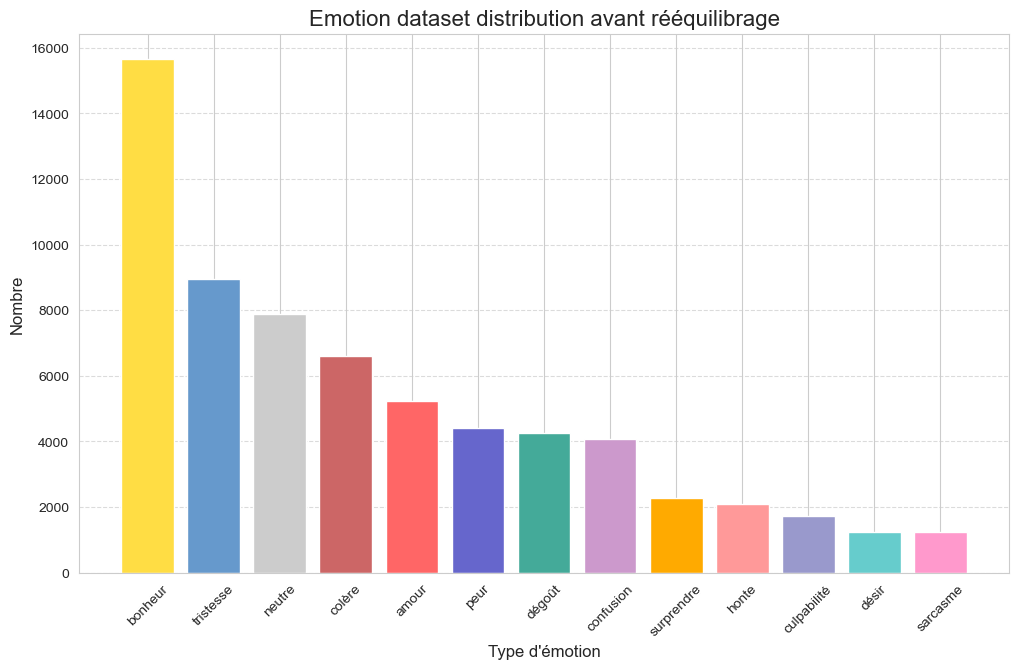

In [23]:
df_counts = df_data[col_emotion].value_counts()
tab_colors = ['#FFDD44', '#6699CC', '#CCCCCC', '#CC6666', '#FF6666', '#6666CC', '#44AA99', '#CC99CC', '#FFAA00', '#FF9999', '#9999CC', '#66CCCC', '#FF99CC']
plt.figure(figsize=(12, 7))
plt.bar(df_counts.index, df_counts.values, color=tab_colors)
plt.title("Emotion dataset distribution avant rééquilibrage", fontsize=16)
plt.xlabel("Type d'émotion", fontsize=12)
plt.ylabel("Nombre", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
if DATA_EQUILIBRAGE == True:
    X = df_data.drop(columns=col_emotion)
    y = df_data[col_emotion]

    rus = RandomUnderSampler(random_state=SEED)
    X_res, y_res = rus.fit_resample(X, y)

    df_data = pd.concat([X_res, y_res], axis=1)

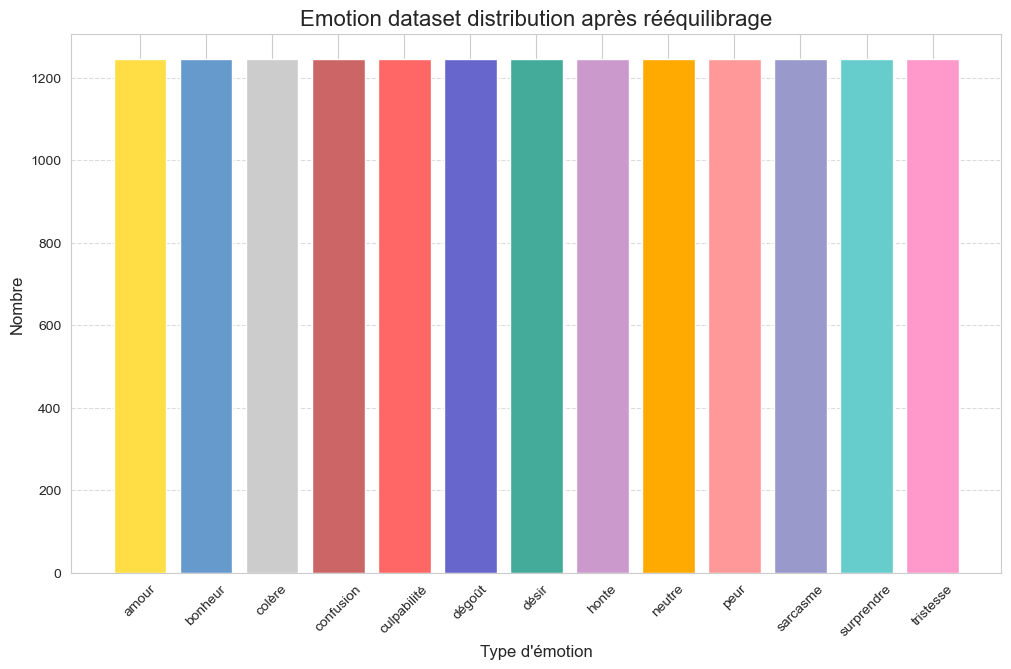

In [25]:
df_counts = df_data[col_emotion].value_counts()
tab_colors = ['#FFDD44', '#6699CC', '#CCCCCC', '#CC6666', '#FF6666', '#6666CC', '#44AA99', '#CC99CC', '#FFAA00', '#FF9999', '#9999CC', '#66CCCC', '#FF99CC']
plt.figure(figsize=(12, 7))
plt.bar(df_counts.index, df_counts.values, color=tab_colors)
plt.title("Emotion dataset distribution après rééquilibrage", fontsize=16)
plt.xlabel("Type d'émotion", fontsize=12)
plt.ylabel("Nombre", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Visualisation du dataset :

In [26]:
n_samples = 10
df_data.sample(n_samples).head(n_samples)

,description_en,emotion_en,description_fr,label_emotion,Emoticone,label_encoded,emotion_fr
14364,i get lots of praises i feel proud sometimes,surprise,je reçois beaucoup déloges je me sens fier parfois,11,😲,11,surprendre
62713,observing muldoon assume the role of my prime minister a wave of dissatisfaction swept over me fueled by a longing for more honorable and inspiring leadership,shame,en voyant muldoon assumer le rôle de mon premier ministre une vague dinsatisfaction ma submergé alimentée par le désir dun leadership plus honorable et plus inspirant,7,🙄,7,honte
30579,i want to build a treehouse,desire,je veux construire une cabane dans les arbres,6,🤩,6,désir
5720,why is this downvoted its right,confusion,pourquoi ce vote estil négatif cest vrai,3,🤔,3,confusion
16178,becoz ive used before and its a really intense high but after a bit of research im extremely hesitant to use it again,confusion,parce que je lai déjà utilisé et cest un effet très intense mais après quelques recherches jhésite extrêmement à lutiliser à nouveau,3,🤔,3,confusion
53858,ive been watching too much my 600lb lifei instantly hear dr,shame,jai trop regardé ma vie de livres jentends instantanément le dr,7,🙄,7,honte
42502,this is not happening,disgust,cela narrive pas,5,🤢,5,dégoût
56891,just the fact that people constantly use words like incel to demean people proves that society is getting worse than it already is,neutral,le simple fait que les gens utilisent constamment des mots comme incel pour rabaisser les autres prouve que la société va encore plus mal quelle ne lest déjà,8,🤨,8,neutre
2914,play great set feel really hesitant ask,fear,jouer un bon set jhésite vraiment demande,9,😨,9,peur
65468,the customer s a jerk but you re really not very clear here,sadness,le client est un con mais tu nes vraiment pas très clair là,12,😓,12,tristesse


In [27]:
df_data.shape

(16172, 7)

- Nombre de classes :

In [28]:
nombre_clusters = len(label_encoder.classes_)
nombre_clusters

13

# <a id='toc2_'></a>[2) Modélisations](#toc0_)

## <a id='toc2_1_'></a>[Définition des fonctions de création des modèles](#toc0_)

### <a id='toc2_1_1_'></a>[Création du réseau de neurones pour le fine-tunning](#toc0_)

**Réseau de neurones :**
- Nous allons créer un réseau de neurones avec les modèles à tester.
- Ces réseaux comprendront les modèles de langage associés à chaque modèle testé, suivi d'une couche de ***Dropout*** et enfin d'une couche ***Linear*** pour obtenir les sorties finales.
- Les données seront fournies au modèle, conformément à la définition du jeu de données.
- Les sorties de la couche finale seront comparées à la catégorie de sentiment afin de déterminer la précision des prédictions du modèle.
- Nous initialiserons une instance du réseau appelée « ***model*** ». Cette instance servira à l'entraînement.

**Fonction loss et optimiser :**
- Les fonctions ***loss*** et ***optimiser*** seront ensuite  définies.
- La fonction ***loss*** calcule la différence entre la sortie générée par le modèle et la sortie réelle.
- La fonction ***optimiser*** met à jour les poids du réseau de neurones afin d'améliorer ses performances.

In [29]:
class EmotionData(Dataset):
    def __init__(self, dataframe, text, target, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe[text]
        self.targets = dataframe[target]
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " " . join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

### <a id='toc2_1_2_'></a>[Fine Tuning](#toc0_)

Après tous les efforts déployés pour charger et préparer les données et les jeux de données, créer le modèle et définir sa fonction de perte loss et sa fonction optimiser, voici probablement les étapes les plus simples du processus.

Nous définissons ici une fonction d'entraînement fn_train qui entraîne le modèle sur le jeu de données d'entraînement créé, un nombre de fois spécifié (***epoch***). Un ***epoch*** définit le nombre de fois où l'ensemble des données sera traité par le réseau.

Les événements suivants se produisent dans cette fonction pour affiner le réseau de neurones :
- Le chargeur de données transmet les données au modèle en fonction de la taille du lot.
- Les sorties successives du modèle et la catégorie réelle sont comparées pour calculer la perte.
- La valeur de la perte est utilisée pour optimiser les poids des neurones du réseau.
- Après chaque série de 5 000 itérations, la valeur de la perte est affichée dans la console.

In [30]:
# Creating the loss function
loss_function = torch.nn.CrossEntropyLoss()

In [31]:
# Définition de la fonction de train sur 80% du dataset pour un fit-tuning du modèle
def fn_train(epoch, model, optimizer):
    tr_loss = 0
    n_correct = 0
    nb_tr_steps = 0
    nb_tr_examples = 0
    model.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.long)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_function(outputs, targets)
        tr_loss += loss.item()
        big_val, big_idx = torch.max(outputs.data, dim=1)
        n_correct += calculate_accuracy(big_idx, targets)

        nb_tr_steps += 1
        nb_tr_examples+=targets.size(0)
        
        if _%5000==0:
            loss_step = tr_loss/nb_tr_steps
            accu_step = (n_correct*100)/nb_tr_examples 
            print(f"Training Loss per 5000 steps : {loss_step}")
            print(f"Training Accuracy per 5000 steps : {accu_step}")

        optimizer.zero_grad()
        loss.backward()
        # # When using GPU
        optimizer.step()

    print(f'\nThe Total Accuracy for Epoch {epoch} : {(n_correct*100)/nb_tr_examples}')
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Training Loss Epoch : {epoch_loss}")
    print(f"Training Accuracy Epoch : {epoch_accu}")

    return 

### <a id='toc2_1_3_'></a>[Valider les modèles](#toc0_)

Lors de la phase de validation, nous soumettons le modèle à des données non vues lors de l'entraînement (jeu de données de test). Cette étape permet d'évaluer la performance du modèle sur ces données.

Ces données non vues correspondent à 20 % du fichier initial, extrait lors de la création du jeu de données.

Durant la phase de validation, les poids du modèle ne sont pas modifiés. Seule la sortie finale est comparée à la valeur réelle. Cette comparaison sert ensuite à calculer la précision du modèle.

In [32]:
# Définition d'une fonction pour évaluer le modèle sur le jeu de train :
def fn_valid_train(model, data_loader):
    model.eval()
    all_preds = []
    all_targets = []
    tr_loss = 0
    nb_tr_steps = 0
    n_correct = 0
    
    with torch.no_grad():
        for _, data in tqdm(enumerate(data_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            #-------------------------JME_CORRECTION-------------------------
            # J'ai enlevé squeeze car il supprime les tenseurs de taille 1 :
            # Or il arrive qu'à la fin du calcul le dernier batch peut etre 
            # à 1, et ne doit pas être supprimé sinon erreur
            # outputs = model(ids, mask, token_type_ids).squeeze()
            outputs = model(ids, mask, token_type_ids)
            #-------------------------JME_CORRECTION-------------------------
            loss = loss_function(outputs, targets)
            tr_loss += loss.item()
            big_val, big_idx = torch.max(outputs.data, dim=1)
            preds, targets = calculate_metrics(big_idx, targets)
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
            
            n_correct += (preds == targets).sum().item()
            nb_tr_steps += 1
        
    epoch_loss = tr_loss / nb_tr_steps
    epoch_accu = (n_correct * 100) / len(data_loader.dataset)

    return all_preds, all_targets, epoch_loss, epoch_accu

In [33]:
# Définition d'une fonction pour évaluer le modèle sur le jeu de test :
def fn_valid_test(model, data_loader):
    model.eval()
    n_correct = 0; n_wrong = 0; total = 0; tr_loss=0; nb_tr_steps=0; nb_tr_examples=0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for _, data in tqdm(enumerate(data_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            #-------------------------JME_CORRECTION-------------------------
            # J'ai enlevé squeeze car il supprime les tenseurs de taille 1 :
            # Or il arrive qu'à la fin du calcul le dernier batch peut etre
            # à 1, et ne doit pas être supprimé sinon erreur
            #outputs = model(ids, mask, token_type_ids).squeeze()
            outputs = model(ids, mask, token_type_ids)
            #-------------------------JME_CORRECTION-------------------------
            loss = loss_function(outputs, targets)
            tr_loss += loss.item()
            big_val, big_idx = torch.max(outputs.data, dim=1)
            preds, targets = calculate_metrics(big_idx, targets)
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
            
            n_correct += (preds == targets).sum().item()

            nb_tr_steps += 1
            nb_tr_examples+=targets.size(0)
            
            if _%5000==0:
                loss_step = tr_loss/nb_tr_steps
                accu_step = (n_correct*100)/nb_tr_examples
                print(f"\nValidation Loss per 100 steps : {loss_step}")
                print(f"Validation Accuracy per 100 steps : {accu_step}")
                
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"\nValidation Loss Epoch : {epoch_loss}")
    print(f"Validation Accuracy Epoch : {epoch_accu}")
    
    return all_preds, all_targets, epoch_accu

In [34]:
train_size = 0.8
data_train = df_data.sample(frac=train_size, random_state=SEED)
data_test = df_data.drop(data_train.index).reset_index(drop=True)
data_train = data_train.reset_index(drop=True)

print("FULL Dataset: {}" . format(df_data.shape))
print("TRAIN Dataset: {}" . format(data_train.shape))
print("TEST Dataset: {}" . format(data_test.shape))

FULL Dataset: (16172, 7)
TRAIN Dataset: (12938, 7)
TEST Dataset: (3234, 7)


## <a id='toc2_2_'></a>[BERT](#toc0_)

- Initialisation :

In [35]:
name_model = "BERT"
name_model_bert = "bert-base-uncased"
bert_tokenizer = BertTokenizer.from_pretrained(
  name_model_bert,
  truncation=True,
  do_lower_case=True)

In [36]:
class BertClass(torch.nn.Module):
    def __init__(self):
        super(BertClass, self).__init__()
        self.l1 = BertModel.from_pretrained(name_model_bert)
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, nombre_clusters)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

In [37]:
training_set = EmotionData(data_train, col_description, "label_encoded", bert_tokenizer, MAX_LEN)
testing_set = EmotionData(data_test, col_description, "label_encoded", bert_tokenizer, MAX_LEN)

In [38]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
}

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
}

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [39]:
bert_model = BertClass()
bert_model.to(device)

BertClass(
  (l1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affin

In [40]:
# Creating the optimizer
optimizer = torch.optim.Adam(params =  bert_model.parameters(), lr=LEARNING_RATE)

- Simulation :

In [41]:
start_time = time.time()

In [42]:
for epoch in range(NB_EPOCHS):
    print(f"Epoch {epoch + 1}/{NB_EPOCHS}\n")

    if DATA_FINETUNING == True:
        fn_train(epoch, bert_model, optimizer)
    
    # Validation sur le jeu de test
    test_preds, test_targets, test_acc = fn_valid_test(bert_model, testing_loader)
    print("\nTest Accuracy = %0.2f%%" % test_acc)
    test_precision = precision_score(test_targets, test_preds, average='weighted')
    test_recall = recall_score(test_targets, test_preds, average='weighted')
    test_f1 = f1_score(test_targets, test_preds, average='weighted')
    test_conf_matrix = confusion_matrix(test_targets, test_preds)
    
    print(f"Test Precision : {test_precision}")
    print(f"Test Recall : {test_recall}")
    print(f"Test F1 Score : {test_f1}")
    print(f"\nTest Confusion Matrix :\n {test_conf_matrix}")
    print(f"\nTest Classification Report :\n{classification_report(test_targets, test_preds)}")

    print("-" * 50)

    # Validation sur le jeu de train
    train_preds, train_targets, train_loss, train_acc = fn_valid_train(bert_model, training_loader)
    print("\nTrain Accuracy = %0.2f%%" % train_acc)
    train_precision = precision_score(train_targets, train_preds, average='weighted')
    train_recall = recall_score(train_targets, train_preds, average='weighted')
    train_f1 = f1_score(train_targets, train_preds, average='weighted')
    train_conf_matrix = confusion_matrix(train_targets, train_preds)
    
    print(f"Train Precision : {train_precision}")
    print(f"Train Recall : {train_recall}")
    print(f"Train F1 Score : {train_f1}")
    print(f"\nTrain Confusion Matrix :\n {train_conf_matrix}")
    print(f"\nTrain Classification Report :\n{classification_report(train_targets, train_preds)}")

    print("-" * 50)

Epoch 1/2



0it [00:00, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Training Loss per 5000 steps : 2.618164539337158
Training Accuracy per 5000 steps : 0.0


1618it [04:39,  5.78it/s]



The Total Accuracy for Epoch 0 : 24.71015612923172
Training Loss Epoch : 2.1814548580622937
Training Accuracy Epoch : 24.71015612923172


2it [00:00, 15.42it/s]


Validation Loss per 100 steps : 1.4341069459915161
Validation Accuracy per 100 steps : 25.0


809it [00:54, 14.84it/s]



Validation Loss Epoch : 1.9176178969470474
Validation Accuracy Epoch : 33.95176252319109

Test Accuracy = 33.95%
Test Precision : 0.3230580854427557
Test Recall : 0.3395176252319109
Test F1 Score : 0.3077280939533649

Test Confusion Matrix :
 [[ 50  46   0   7   8  11  12   2  53   2   8  36   3]
 [ 33  64   0   6  15  16   3   2  35   8   5  51  15]
 [  6  49   0   3  28  33   1   6  42   6   2  51  11]
 [ 26  36   0  28  17  30   2   5  90   3   1   9   0]
 [  9  22   0   9 152  15   2   4  13   2   2  16   2]
 [ 16  21   1  16  38  79   6   6  68   4   2  13   0]
 [ 10  11   0   2   1   3 224   0  12   0   3   1   0]
 [  7  31   0   4 100  31   0  10  26   8   4  11   2]
 [ 33  23   0   9   8  48   6   2 109   2   3   5   0]
 [  9  44   0   7  35  22   4   6  20  30   0  66  13]
 [  5   3   0   0   0   0   0   0   0   0 215   0   0]
 [ 13  53   0   3  14   5   5   1  23  17   5 113  13]
 [  9  34   0   3  44  16   3   2  18  17   3  74  24]]

Test Classification Report :
          

1618it [01:52, 14.33it/s]



Train Accuracy = 36.14%
Train Precision : 0.3575726018581342
Train Recall : 0.36141598392332663
Train F1 Score : 0.3242115995725965

Train Confusion Matrix :
 [[ 302  204    1   19   21   40   40    5  161   12   40  152    9]
 [ 114  265    0   13   45   60   30   10  156   12   25  239   22]
 [  40  172    3   44  117  150   14   18  162   27    5  203   51]
 [  73  140    1  100   45  176    8   16  365    7   11   55    0]
 [  16   70    0   25  645   77    5   12   60   23    2   42   19]
 [  52   89    0   57  138  317    7   23  227   15   10   39    0]
 [  28   36    0    5    1    4  863    1   30    0    3    6    0]
 [  25   72    1   51  477  139    7   42   98   21   11   59    7]
 [ 119   97    0   50   21  150   25   11  471    2   11   38    1]
 [  30  157    0   32   96   98   10   25   79  118    6  273   64]
 [   6   10    0    0    0    0    0    0    2    0 1003    0    0]
 [  52  199    1   30   42   20   13    6   59   39   12  461   45]
 [  36  182    5   21  1

0it [00:00, ?it/s]

Training Loss per 5000 steps : 1.7503256797790527
Training Accuracy per 5000 steps : 25.0


1618it [04:39,  5.79it/s]



The Total Accuracy for Epoch 1 : 37.447828103261706
Training Loss Epoch : 1.7958484980541343
Training Accuracy Epoch : 37.447828103261706


2it [00:00, 14.90it/s]


Validation Loss per 100 steps : 2.14569354057312
Validation Accuracy per 100 steps : 25.0


809it [00:54, 14.79it/s]



Validation Loss Epoch : 1.7432337268468623
Validation Accuracy Epoch : 39.48670377241806

Test Accuracy = 39.49%
Test Precision : 0.38452797170576525
Test Recall : 0.3948670377241806
Test F1 Score : 0.3708288967504401

Test Confusion Matrix :
 [[111  29   0   5  10  11  13   0  25   2   4   9  19]
 [ 54  62   0   9  10  15   8   3  26  11   6  14  35]
 [ 14  22   0  16  16  42   3  17  35   9   1   6  57]
 [ 33  10   0  45  11  38   7   5  83   1   1   3  10]
 [  7   4   1  10 150  32   2  18   9   3   1   1  10]
 [ 19   5   0  21  26 113   6  15  54   0   0   3   8]
 [  7   3   1   1   3   1 239   1   9   0   2   0   0]
 [ 13   7   0   9  89  33   2  48  22   4   2   1   4]
 [ 40   8   0  19   4  49   8   4 110   0   3   0   3]
 [ 10  10   0   9  14  37   4  15  19  56   0   7  75]
 [  5   0   0   0   3   0   0   0   0   1 214   0   0]
 [ 33  45   0  13  10   9   7   4  19  13   3  47  62]
 [ 13  30   0   9  35  34   3  11   8  11   2   9  82]]

Test Classification Report :
         

1618it [01:57, 13.80it/s]


Train Accuracy = 45.81%
Train Precision : 0.47213872128506
Train Recall : 0.45810789921162465
Train F1 Score : 0.4311590364423955

Train Confusion Matrix :
 [[ 571  145    1   10   15   21   40    4   72   12   29   35   51]
 [ 270  251    0   22   42   48   37    8  102    8    9   73  121]
 [  48   75    2   60   57  225   16   61  126   36    4   38  258]
 [  93   29    0  222   24  192   24   12  350   11    6   10   24]
 [  16    7    0   45  671   87    5   90   38    4    3    3   27]
 [  43   11    1   86   52  488   11   70  170    8    9    4   21]
 [  17    3    0    1    7    9  910    1   27    0    1    1    0]
 [  24   19    0   67  347  168    7  259   70   13    3    6   27]
 [ 132   25    1   65   16  126   33    6  562    3   16    5    6]
 [  26   64    0   23   49  145    6   39   64  233    1   24  314]
 [   3    0    0    0   10    0    0    0    0    0 1008    0    0]
 [  99  179    0   49   18   22   15    6   53   35    9  310  184]
 [  39  100    0   16  105

In [43]:
end_time = time.time()

- Matrices de confusion :

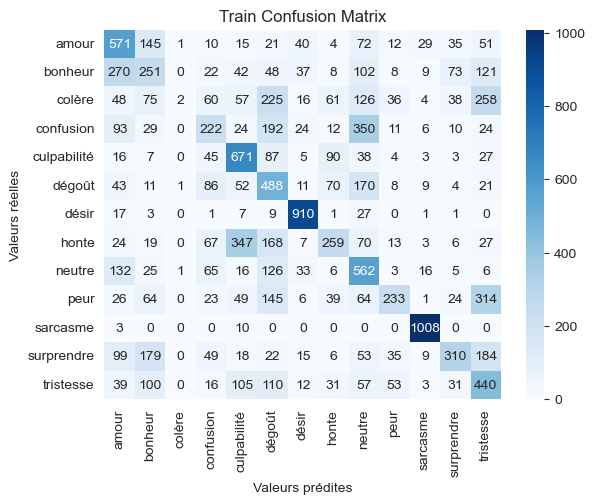

In [44]:
# Matrice de confusion train : 
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Train Confusion Matrix')
plt.show()

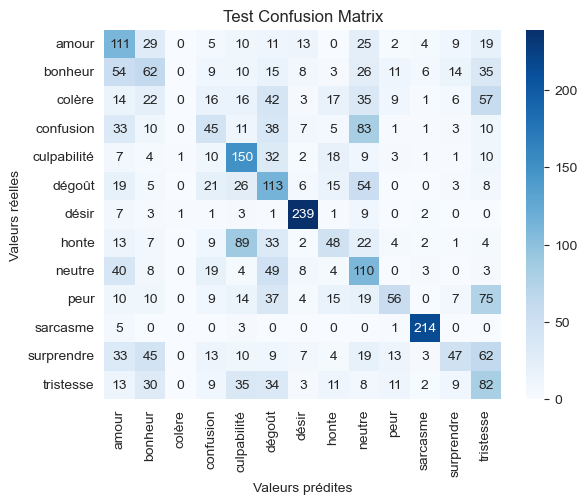

In [45]:
# Matrice de confusion test : 
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Test Confusion Matrix')
plt.show()

- Résultats :

In [46]:
duration = end_time - start_time

In [47]:
score_results = np.append(score_results, [[
  "Train",
  name_model,
  train_acc,
  train_precision,
  train_recall,
  train_f1,
  duration
]], axis=0)

score_results = np.append(score_results, [[
  "Test",
  name_model,
  test_acc,
  test_precision,
  test_recall,
  test_f1,
  duration
]], axis=0)

In [48]:
df_score_results = fn_score_results(score_results)
df_score_results.head(10)

,Type,Modele,Accuracy,Precision,Recall,F1-Score,Time
0,Train,BERT,45.81,0.47,0.46,0.43,898.86
1,Test,BERT,39.49,0.38,0.39,0.37,898.86


## <a id='toc2_3_'></a>[ALBERT](#toc0_)

- Initialisation :

In [49]:
name_model = "ALBERT"
name_model_albert = "albert-base-v2"
albert_tokenizer = AlbertTokenizer.from_pretrained(
  name_model_albert,
  truncation=True,
  do_lower_case=True
)

In [50]:
class AlbertClass(torch.nn.Module):
    def __init__(self):
        super(AlbertClass, self).__init__()
        self.l1 = AlbertModel.from_pretrained(name_model_albert)
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, nombre_clusters)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

In [51]:
training_set = EmotionData(data_train, col_description, "label_encoded", albert_tokenizer, MAX_LEN)
testing_set = EmotionData(data_test, col_description, "label_encoded", albert_tokenizer, MAX_LEN)

In [52]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
}

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
}

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [53]:
albert_model = AlbertClass()
albert_model.to(device)

AlbertClass(
  (l1): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertSdpaAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
        

In [54]:
# Creating the optimizer
optimizer = torch.optim.Adam(params =  albert_model.parameters(), lr=LEARNING_RATE)

- Simulation :

In [55]:
start_time = time.time()

In [56]:
for epoch in range(NB_EPOCHS):
    print(f"Epoch {epoch + 1}/{NB_EPOCHS}\n")

    if DATA_FINETUNING == True:
        fn_train(epoch, albert_model, optimizer)
    
    # Validation sur le jeu de test
    test_preds, test_targets, test_acc = fn_valid_test(albert_model, testing_loader)
    print("\nTest Accuracy = %0.2f%%" % test_acc)
    test_precision = precision_score(test_targets, test_preds, average='weighted')
    test_recall = recall_score(test_targets, test_preds, average='weighted')
    test_f1 = f1_score(test_targets, test_preds, average='weighted')
    test_conf_matrix = confusion_matrix(test_targets, test_preds)
    
    print(f"Test Precision : {test_precision}")
    print(f"Test Recall : {test_recall}")
    print(f"Test F1 Score : {test_f1}")
    print(f"\nTest Confusion Matrix :\n {test_conf_matrix}")
    print(f"\nTest Classification Report :\n{classification_report(test_targets, test_preds)}")

    print("-" * 50)

    # Validation sur le jeu de train
    train_preds, train_targets, train_loss, train_acc = fn_valid_train(albert_model, training_loader)
    print("\nTrain Accuracy = %0.2f%%" % train_acc)
    train_precision = precision_score(train_targets, train_preds, average='weighted')
    train_recall = recall_score(train_targets, train_preds, average='weighted')
    train_f1 = f1_score(train_targets, train_preds, average='weighted')
    train_conf_matrix = confusion_matrix(train_targets, train_preds)
    
    print(f"Train Precision : {train_precision}")
    print(f"Train Recall : {train_recall}")
    print(f"Train F1 Score : {train_f1}")
    print(f"\nTrain Confusion Matrix :\n {train_conf_matrix}")
    print(f"\nTrain Classification Report :\n{classification_report(train_targets, train_preds)}")

    print("-" * 50)


Epoch 1/2



0it [00:00, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
2it [00:00,  9.65it/s]

Training Loss per 5000 steps : 2.592763662338257
Training Accuracy per 5000 steps : 12.5


1618it [03:56,  6.83it/s]



The Total Accuracy for Epoch 0 : 8.51754521564384
Training Loss Epoch : 2.568638811300063
Training Accuracy Epoch : 8.51754521564384


4it [00:00, 37.23it/s]


Validation Loss per 100 steps : 2.5767171382904053
Validation Accuracy per 100 steps : 0.0


809it [00:20, 38.89it/s]



Validation Loss Epoch : 2.567872087504572
Validation Accuracy Epoch : 8.348794063079778

Test Accuracy = 8.35%
Test Precision : 0.04374525462750357
Test Recall : 0.08348794063079777
Test F1 Score : 0.013439235653072645

Test Confusion Matrix :
 [[  1   0   0   0   0 237   0   0   0   0   0   0   0]
 [  0   0   0   0   0 253   0   0   0   0   0   0   0]
 [  0   0   0   0   0 238   0   0   0   0   0   0   0]
 [  0   0   0   0   0 247   0   0   0   0   0   0   0]
 [  0   0   0   0   0 248   0   0   0   0   0   0   0]
 [  1   0   0   0   0 269   0   0   0   0   0   0   0]
 [  0   0   0   0   0 267   0   0   0   0   0   0   0]
 [  0   0   0   0   0 234   0   0   0   0   0   0   0]
 [  0   0   0   0   0 248   0   0   0   0   0   0   0]
 [  0   0   0   0   0 256   0   0   0   0   0   0   0]
 [  0   0   0   0   0 223   0   0   0   0   0   0   0]
 [  0   0   0   0   0 265   0   0   0   0   0   0   0]
 [  0   0   0   0   0 247   0   0   0   0   0   0   0]]

Test Classification Report :
        

1618it [01:35, 16.99it/s]



Train Accuracy = 7.56%
Train Precision : 0.04807351113314414
Train Recall : 0.07559128149636729
Train F1 Score : 0.011446890037062757

Train Confusion Matrix :
 [[   6    0    0    0    0 1000    0    0    0    0    0    0    0]
 [   1    0    0    0    1  989    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1006    0    0    0    0    0    0    0]
 [   0    0    0    0    0  997    0    0    0    0    0    0    0]
 [   0    0    0    0    0  996    0    0    0    0    0    0    0]
 [   2    0    0    0    0  972    0    0    0    0    0    0    0]
 [   0    0    0    0    0  977    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1010    0    0    0    0    0    0    0]
 [   1    0    0    0    0  995    0    0    0    0    0    0    0]
 [   0    0    0    0    0  988    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1021    0    0    0    0    0    0    0]
 [   1    0    0    0    1  977    0    0    0    0    0    0    0]
 [   0    0    0    0 

1it [00:00,  6.44it/s]

Training Loss per 5000 steps : 2.559075117111206
Training Accuracy per 5000 steps : 0.0


1618it [04:00,  6.72it/s]



The Total Accuracy for Epoch 1 : 11.423713093213788
Training Loss Epoch : 2.5051487344599184
Training Accuracy Epoch : 11.423713093213788


4it [00:00, 37.80it/s]


Validation Loss per 100 steps : 2.8668346405029297
Validation Accuracy per 100 steps : 0.0


809it [00:20, 38.71it/s]



Validation Loss Epoch : 2.456539373462663
Validation Accuracy Epoch : 12.492269635126778

Test Accuracy = 12.49%
Test Precision : 0.06103367142978929
Test Recall : 0.12492269635126778
Test F1 Score : 0.07368479119421832

Test Confusion Matrix :
 [[  0   0   3  11   0   0  58  17   0   0  29 120   0]
 [  0   0  14   7   0   0  58  23   1   0  14 136   0]
 [  0   0  18   9   0   0  51  27   1   0   8 124   0]
 [  0   1   6  10   0   0  61  19   0   0   9 141   0]
 [  0   2  12  10   0   0  33  38   0   0   5 148   0]
 [  0   0  11   6   0   0  61  33   0   0   9 150   0]
 [  0   1   1   7   0   0  52   6   0   0 140  60   0]
 [  0   1  13   6   0   0  47  23   1   0  13 130   0]
 [  0   0   6   9   0   0  62  24   0   0  12 135   0]
 [  0   0  13  13   0   0  59  28   0   0   5 138   0]
 [  0   2   1   6   0   0  33   1   0   1 165  14   0]
 [  0   0  21  20   0   0  54  20   1   0  13 136   0]
 [  0   1  26  15   0   0  57  20   0   0   6 122   0]]

Test Classification Report :
       

1618it [01:23, 19.29it/s]



Train Accuracy = 13.21%
Train Precision : 0.10691111509376039
Train Recall : 0.1320915133714639
Train F1 Score : 0.08092693640786357

Train Confusion Matrix :
 [[  1   3  24  30   0   0 260  70   0   0 125 493   0]
 [  0   3  46  42   0   0 258  84   1   0  51 506   0]
 [  0   1  74  31   0   0 218 101   1   0  27 553   0]
 [  0   2  49  33   0   0 230  79   0   1  32 571   0]
 [  0   1  59  36   0   0 148 142   1   1  22 586   0]
 [  1   1  48  40   0   0 229  94   2   0  27 532   0]
 [  0   3   5  24   0   0 229  23   0   1 528 164   0]
 [  1   2  44  36   0   0 188  98   2   0  31 608   0]
 [  0   0  35  42   0   0 308  77   1   0  75 458   0]
 [  0   1  68  59   0   0 214  88   2   0  25 531   0]
 [  0  12   1  31   0   0 140   4   0   1 725 107   0]
 [  0   1  73  39   0   0 190  91   1   0  39 545   0]
 [  0   2  74  45   0   0 230  98   2   0  25 521   0]]

Train Classification Report :
              precision    recall  f1-score   support

           0       0.33      0.00    

In [57]:
end_time = time.time()

- Matrices de confusion :

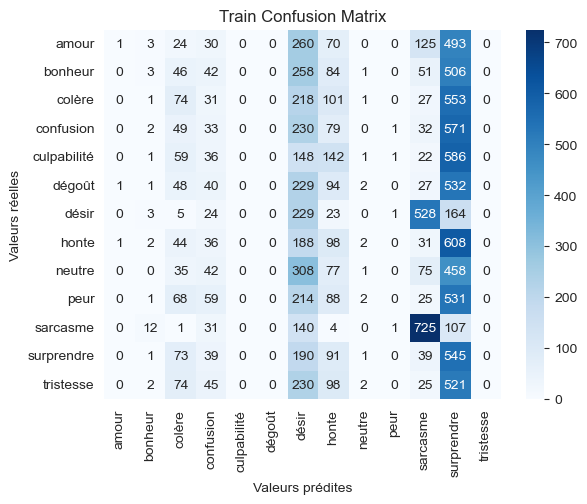

In [58]:
# Matrice de confusion train : 
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Train Confusion Matrix')
plt.show()

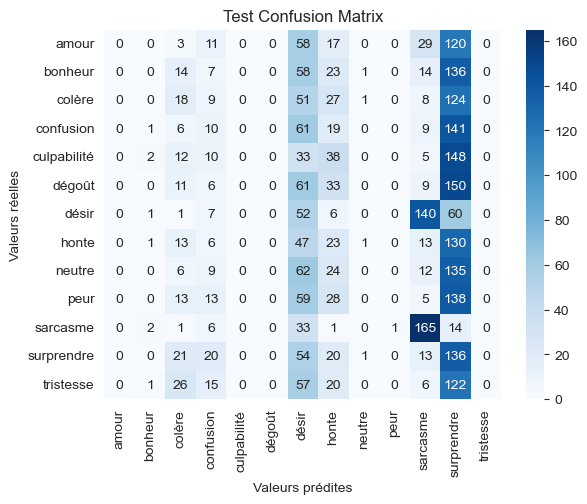

In [59]:
# Matrice de confusion test : 
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Test Confusion Matrix')
plt.show()

- Résultats :

In [60]:
duration = end_time - start_time

In [61]:
score_results = np.append(score_results, [[
  "Train",
  name_model,
  train_acc,
  train_precision,
  train_recall,
  train_f1,
  duration
]], axis=0)

score_results = np.append(score_results, [[
  "Test",
  name_model,
  test_acc,
  test_precision,
  test_recall,
  test_f1,
  duration
]], axis=0)

In [62]:
df_score_results = fn_score_results(score_results)
df_score_results.head(10)

,Type,Modele,Accuracy,Precision,Recall,F1-Score,Time
0,Train,BERT,45.81,0.47,0.46,0.43,898.86
1,Test,BERT,39.49,0.38,0.39,0.37,898.86
2,Train,ALBERT,13.21,0.11,0.13,0.08,698.78
3,Test,ALBERT,12.49,0.06,0.12,0.07,698.78


## <a id='toc2_4_'></a>[RoBERTa](#toc0_)

- Initialisation :

In [63]:
name_model = "RoBERTa"
name_model_roberta = "roberta-base"
roberta_tokenizer = RobertaTokenizer.from_pretrained(
  name_model_roberta,
  truncation=True,
  do_lower_case=True
)

In [64]:
class RobertaClass(torch.nn.Module):
    def __init__(self):
        super(RobertaClass, self).__init__()
        self.l1 = RobertaModel.from_pretrained(name_model_roberta)
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, nombre_clusters)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

In [65]:
training_set = EmotionData(data_train, col_description, "label_encoded", roberta_tokenizer, MAX_LEN)
testing_set = EmotionData(data_test, col_description, "label_encoded", roberta_tokenizer, MAX_LEN)

In [66]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
}

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
}

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [67]:
roberta_model = RobertaClass()
roberta_model.to(device)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaClass(
  (l1): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNo

In [68]:
# Creating the optimizer
optimizer = torch.optim.Adam(params =  roberta_model.parameters(), lr=LEARNING_RATE)

- Simulation :

In [69]:
start_time = time.time()

In [70]:
for epoch in range(NB_EPOCHS):
    print(f"Epoch {epoch + 1}/{NB_EPOCHS}\n")

    if DATA_FINETUNING == True:
        fn_train(epoch, roberta_model, optimizer)
    
    # Validation sur le jeu de test
    test_preds, test_targets, test_acc = fn_valid_test(roberta_model, testing_loader)
    print("\nTest Accuracy = %0.2f%%" % test_acc)
    test_precision = precision_score(test_targets, test_preds, average='weighted')
    test_recall = recall_score(test_targets, test_preds, average='weighted')
    test_f1 = f1_score(test_targets, test_preds, average='weighted')
    test_conf_matrix = confusion_matrix(test_targets, test_preds)
    
    print(f"Test Precision : {test_precision}")
    print(f"Test Recall : {test_recall}")
    print(f"Test F1 Score : {test_f1}")
    print(f"\nTest Confusion Matrix :\n {test_conf_matrix}")
    print(f"\nTest Classification Report :\n{classification_report(test_targets, test_preds)}")

    print("-" * 50)

    # Validation sur le jeu de train
    train_preds, train_targets, train_loss, train_acc = fn_valid_train(roberta_model, training_loader)
    print("\nTrain Accuracy = %0.2f%%" % train_acc)
    train_precision = precision_score(train_targets, train_preds, average='weighted')
    train_recall = recall_score(train_targets, train_preds, average='weighted')
    train_f1 = f1_score(train_targets, train_preds, average='weighted')
    train_conf_matrix = confusion_matrix(train_targets, train_preds)
    
    print(f"Train Precision : {train_precision}")
    print(f"Train Recall : {train_recall}")
    print(f"Train F1 Score : {train_f1}")
    print(f"\nTrain Confusion Matrix :\n {train_conf_matrix}")
    print(f"\nTrain Classification Report :\n{classification_report(train_targets, train_preds)}")

    print("-" * 50)


Epoch 1/2



0it [00:00, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Training Loss per 5000 steps : 2.6426897048950195
Training Accuracy per 5000 steps : 0.0


1618it [03:51,  6.98it/s]



The Total Accuracy for Epoch 0 : 22.746946977894574
Training Loss Epoch : 2.2143726773624515
Training Accuracy Epoch : 22.746946977894574


3it [00:00, 29.89it/s]


Validation Loss per 100 steps : 2.6163508892059326
Validation Accuracy per 100 steps : 25.0


809it [00:18, 42.63it/s]



Validation Loss Epoch : 1.9289581954147672
Validation Accuracy Epoch : 32.25108225108225

Test Accuracy = 32.25%
Test Precision : 0.319034378700384
Test Recall : 0.3225108225108225
Test F1 Score : 0.28304615307011793

Test Confusion Matrix :
 [[  7   5   0   6   5  43   9  20  66   4   7  44  22]
 [  6   3   0   4  14  45   5  18  44   3   2  66  43]
 [  2   4   0   7  14  46   4  32  26   2   0  77  24]
 [  2   2   0  14   8  85   3  41  61   0   1  28   2]
 [  1   3   0   3 152  21   2  33   9   0   0  21   3]
 [  2   3   1  13  26  97   3  62  40   1   1  18   3]
 [  3   0   0   3   3  10 216   5  13   0   1  12   1]
 [  0  11   0   6  85  39   1  56  16   0   2  15   3]
 [  0   0   0  16   6  80   8  28  88   2   5  14   1]
 [  0   4   0   1  24  33   9  42  14  20   1  75  33]
 [  0   3   0   0   0   1   0   0   6   0 213   0   0]
 [  0   6   0   4  12  15   9  14  29   1   3 132  40]
 [  0   4   0   3  37  22   5  35  13   2   0  81  45]]

Test Classification Report :
          

1618it [01:37, 16.55it/s]



Train Accuracy = 34.55%
Train Precision : 0.3508493807397021
Train Recall : 0.34549389395578917
Train F1 Score : 0.30314824892623526

Train Confusion Matrix :
 [[ 30   8   0  26  11 168  55  89 290  10  29 190 100]
 [ 25  33   0  28  31 134  34  84 193   9  14 287 119]
 [  2  21   0  21  59 234  18 161  94   4   2 257 133]
 [  3  10   0  79  34 350   8 142 246   4   5 111   5]
 [  0  25   0  13 657  59   6 134  43   2   0  43  14]
 [  5  14   0  16  84 405   8 199 145   1   1  89   7]
 [  4   5   0   9   2  26 823  14  58   1   5  27   3]
 [  2  20   0  14 391 151   7 253  67   2   2  87  14]
 [  3  13   0  28   6 347  31  97 389   3   7  69   3]
 [  3  21   0  13  76 115   9 132  57  82   2 323 155]
 [  1   8   0   0   2   2   0   0  19   0 989   0   0]
 [  2  11   0  23  24  64  17  66  80   5  12 544 131]
 [  6  19   0   6 134  88  19 107  54  18   1 359 186]]

Train Classification Report :
              precision    recall  f1-score   support

           0       0.35      0.03    

1it [00:00,  5.49it/s]

Training Loss per 5000 steps : 1.1317414045333862
Training Accuracy per 5000 steps : 62.5


1618it [04:54,  5.49it/s]



The Total Accuracy for Epoch 1 : 34.97449373937239
Training Loss Epoch : 1.8444033106708408
Training Accuracy Epoch : 34.97449373937239


2it [00:00, 16.53it/s]


Validation Loss per 100 steps : 2.2860405445098877
Validation Accuracy per 100 steps : 50.0


809it [00:50, 15.96it/s]



Validation Loss Epoch : 1.7797714884868363
Validation Accuracy Epoch : 37.78602350030921

Test Accuracy = 37.79%
Test Precision : 0.38164386309908105
Test Recall : 0.3778602350030921
Test F1 Score : 0.3544715585752563

Test Confusion Matrix :
 [[ 17  31   6   6   1  12  18   9  60   7   8  51  12]
 [  8  33   8   8   2  15  13  17  34  22   4  66  23]
 [  2   3  19  15   4  35   8  22  27  27   1  56  19]
 [  2  13  20  39   1  26   8  18  79   4   2  32   3]
 [  0   3  10   9  88   9   3  90  12   2   0  16   6]
 [  4   6  10  24   9  76   5  46  56   4   1  26   3]
 [  0   5   1   3   1   3 230   4  14   1   0   5   0]
 [  0   5  17   7  17  24   3 117  19   4   3  16   2]
 [  2   7   5  29   2  28  12   9 121   2   6  24   1]
 [  1   3   9   4   7  26   7  25  16  96   0  46  16]
 [  0   0   3   0   0   0   0   0   0   1 219   0   0]
 [  1  11  11   8   3   5  10   6  27  22   3 133  25]
 [  1   5   5   7  23  17   4  38  12  34   2  65  34]]

Test Classification Report :
         

1618it [01:53, 14.28it/s]



Train Accuracy = 42.73%
Train Precision : 0.4440412007120516
Train Recall : 0.4272685113618797
Train F1 Score : 0.4044018165771802

Train Confusion Matrix :
 [[ 140  109   12   37    3   37  100   23  220   27   41  212   45]
 [  30  160   39   34   12   36   64   35  169   42   21  289   60]
 [   5   24   88   51   17  150   32   91  144   99    1  220   84]
 [   8   37   38  182    9  138   23   56  345   10    8  141    2]
 [   2    8   36   24  438   40   11  337   39   10    0   46    5]
 [   7   19   50   75   20  329   13  138  204   15    2   98    4]
 [   3   10    7    6    1    1  887    8   38    1    1   13    1]
 [   0   16   37   46   84   96   18  545   77   12    3   71    5]
 [  25   26   24   86    1   93   44   30  555    3   20   88    1]
 [   2   11   34   26   15   94   11   76   57  402    2  190   68]
 [   2    0   10    0    0    0    1    0    1    0 1007    0    0]
 [  10   31   30   46    6   20   23   21   59   57    9  614   53]
 [   4   21   41   19   5

In [71]:
end_time = time.time()

- Matrices de confusion :

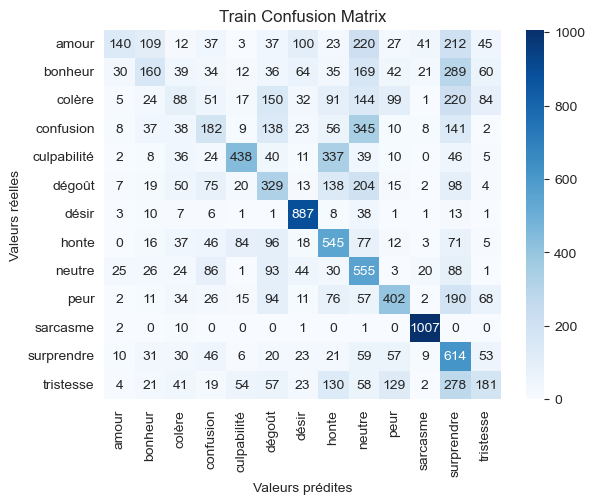

In [72]:
# Matrice de confusion train : 
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Train Confusion Matrix')
plt.show()

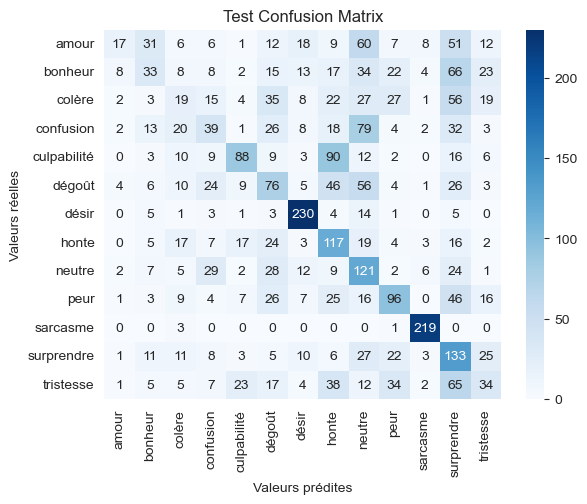

In [73]:
# Matrice de confusion test : 
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Test Confusion Matrix')
plt.show()

- Résultats :

In [74]:
duration = end_time - start_time

In [75]:
score_results = np.append(score_results, [[
  "Train",
  name_model,
  train_acc,
  train_precision,
  train_recall,
  train_f1,
  duration
]], axis=0)

score_results = np.append(score_results, [[
  "Test",
  name_model,
  test_acc,
  test_precision,
  test_recall,
  test_f1,
  duration
]], axis=0)

In [76]:
df_score_results = fn_score_results(score_results)
df_score_results.head(10)

,Type,Modele,Accuracy,Precision,Recall,F1-Score,Time
0,Train,BERT,45.81,0.47,0.46,0.43,898.86
1,Test,BERT,39.49,0.38,0.39,0.37,898.86
2,Train,ALBERT,13.21,0.11,0.13,0.08,698.78
3,Test,ALBERT,12.49,0.06,0.12,0.07,698.78
4,Train,RoBERTa,42.73,0.44,0.43,0.40,808.44
5,Test,RoBERTa,37.79,0.38,0.38,0.35,808.44


## <a id='toc2_5_'></a>[camemBERT](#toc0_)

- Initialisation :

In [77]:
name_model = "CamemBERT"
name_model_camembert = "camembert-base"
camembert_tokenizer = CamembertTokenizer.from_pretrained(
  name_model_camembert,
  truncation=True,
  do_lower_case=True
)

In [78]:
class CamembertClass(torch.nn.Module):
    def __init__(self):
        super(CamembertClass, self).__init__()
        self.l1 = CamembertModel.from_pretrained(name_model_camembert)
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, nombre_clusters)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

In [79]:
training_set = EmotionData(data_train, col_description, "label_encoded", camembert_tokenizer, MAX_LEN)
testing_set = EmotionData(data_test, col_description, "label_encoded", camembert_tokenizer, MAX_LEN)

In [80]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
}

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
}

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [81]:
# Version avec CUDA si dispo :
camembert_model = CamembertClass()
camembert_model.to(device)

CamembertClass(
  (l1): CamembertModel(
    (embeddings): CamembertEmbeddings(
      (word_embeddings): Embedding(32005, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): CamembertEncoder(
      (layer): ModuleList(
        (0-11): 12 x CamembertLayer(
          (attention): CamembertAttention(
            (self): CamembertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): CamembertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (Lay

In [82]:
# Version avec CPU si CUDA out of memory :
# camembert_model = CamembertClass()
# camembert_model.to(device_cpu)
# device = device_cpu

In [83]:
# Creating the optimizer
optimizer = torch.optim.Adam(params =  camembert_model.parameters(), lr=LEARNING_RATE)

- Simulation :

In [84]:
start_time = time.time()

In [85]:
for epoch in range(NB_EPOCHS):
    print(f"Epoch {epoch + 1}/{NB_EPOCHS}\n")

    if DATA_FINETUNING == True:
        fn_train(epoch, camembert_model, optimizer)
    
    # Validation sur le jeu de test
    test_preds, test_targets, test_acc = fn_valid_test(camembert_model, testing_loader)
    print("\nTest Accuracy = %0.2f%%" % test_acc)
    test_precision = precision_score(test_targets, test_preds, average='weighted')
    test_recall = recall_score(test_targets, test_preds, average='weighted')
    test_f1 = f1_score(test_targets, test_preds, average='weighted')
    test_conf_matrix = confusion_matrix(test_targets, test_preds)
    
    print(f"Test Precision : {test_precision}")
    print(f"Test Recall : {test_recall}")
    print(f"Test F1 Score : {test_f1}")
    print(f"\nTest Confusion Matrix :\n {test_conf_matrix}")
    print(f"\nTest Classification Report :\n{classification_report(test_targets, test_preds)}")

    print("-" * 50)

    # Validation sur le jeu de train
    train_preds, train_targets, train_loss, train_acc = fn_valid_train(camembert_model, training_loader)
    print("\nTrain Accuracy = %0.2f%%" % train_acc)
    train_precision = precision_score(train_targets, train_preds, average='weighted')
    train_recall = recall_score(train_targets, train_preds, average='weighted')
    train_f1 = f1_score(train_targets, train_preds, average='weighted')
    train_conf_matrix = confusion_matrix(train_targets, train_preds)
    
    print(f"Train Precision : {train_precision}")
    print(f"Train Recall : {train_recall}")
    print(f"Train F1 Score : {train_f1}")
    print(f"\nTrain Confusion Matrix :\n {train_conf_matrix}")
    print(f"\nTrain Classification Report :\n{classification_report(train_targets, train_preds)}")

    print("-" * 50)


Epoch 1/2



0it [00:00, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
1it [00:00,  2.64it/s]

Training Loss per 5000 steps : 2.5510568618774414
Training Accuracy per 5000 steps : 12.5


1618it [04:42,  5.72it/s]



The Total Accuracy for Epoch 0 : 35.02859792858247
Training Loss Epoch : 2.166717011421661
Training Accuracy Epoch : 35.02859792858247


2it [00:00, 15.90it/s]


Validation Loss per 100 steps : 2.097046375274658
Validation Accuracy per 100 steps : 25.0


809it [00:46, 17.58it/s]



Validation Loss Epoch : 1.7417241357386628
Validation Accuracy Epoch : 44.8051948051948

Test Accuracy = 44.81%
Test Precision : 0.444770463463649
Test Recall : 0.44805194805194803
Test F1 Score : 0.40119827036798644

Test Confusion Matrix :
 [[114   0   1   8   7   7   7   0  14   8  14  46  12]
 [ 75   0   0  13  14  11   2   1  26  19   7  74  11]
 [  7   0   7  23  29  86   1   3   6  39   0  14  23]
 [ 17   0   0  85  18  75   6   1  28  12   0   1   4]
 [  4   0   0   8 186  24   1   1   7   6   0   5   6]
 [  7   0   0  43  34 142   3   3  21  12   1   1   3]
 [ 12   0   0   5   2   0 235   0   7   3   0   3   0]
 [  7   0   0  10 128  42   0   6   6  10   2   2  21]
 [ 17   0   1  69  12  48   4   2  82   7   2   3   1]
 [  0   0   0  11  22  42   3   3   2 161   0   4   8]
 [  0   0   0   0   0   0   0   0   0   1 219   0   3]
 [ 26   0   0  18   5  10   3   0  12  36   4 140  11]
 [  7   0   0   6  52  25   2   1   3  71   0   8  72]]

Test Classification Report :
          

1618it [01:41, 15.98it/s]



Train Accuracy = 48.15%
Train Precision : 0.4414486537334647
Train Recall : 0.4815272839697017
Train F1 Score : 0.4225209678803869

Train Confusion Matrix :
 [[ 589    0    1   16   14   25   20    0   42   36   38  202   23]
 [ 363    1    4   20   14   38   13    1  103   43   29  316   46]
 [  21    0    9   93  137  348    9   11   28  179    4   52  115]
 [  50    3    4  374   44  291   25    8  111   42    6   20   19]
 [  16    0    0   34  796   56    3    2   20   17    3   12   37]
 [  31    0    3  115   91  603    3   10   45   38    2    9   24]
 [  32    0    1    5    2    4  892    0   24    3    0    5    9]
 [  14    0    1   45  600  211    5   17   21   44    1   18   33]
 [ 101    0    2  245   26  148   26    2  389   17   11   10   19]
 [   5    0    0   39   48  103    2    6    9  697    0   34   45]
 [   0    0    0    0    0    0    0    0    1    0 1010    0   10]
 [  96    1    1   57   10   29    8    0   34   87   19  609   28]
 [  16    2    4   21  20

0it [00:00, ?it/s]

Training Loss per 5000 steps : 1.2114081382751465
Training Accuracy per 5000 steps : 75.0


1618it [04:03,  6.66it/s]



The Total Accuracy for Epoch 1 : 50.2705209460504
Training Loss Epoch : 1.5453078063073646
Training Accuracy Epoch : 50.2705209460504


4it [00:00, 34.38it/s]


Validation Loss per 100 steps : 0.9783037304878235
Validation Accuracy per 100 steps : 75.0


809it [00:18, 43.80it/s]



Validation Loss Epoch : 1.4667304423263547
Validation Accuracy Epoch : 51.79344465058751

Test Accuracy = 51.79%
Test Precision : 0.5378145316979447
Test Recall : 0.5179344465058751
Test F1 Score : 0.49884044426475077

Test Confusion Matrix :
 [[129   7   1   2   5   5  10   0  33   2   6  25  13]
 [ 73  13   2   4   8   4   1   4  58   4   0  60  22]
 [  6   0  44  15   8  61   0  15  33   9   0   9  38]
 [  6   0   6  82   5  48   2   7  75   3   1   2  10]
 [  3   1   1   7 172  10   1  15  22   1   0   4  11]
 [  7   0   1  31  15 117   3  14  67   3   2   3   7]
 [  9   0   0   1   2   0 236   0  13   1   0   3   2]
 [  5   2   1  11  87  24   1  54  26   6   2   4  11]
 [ 13   1   3  23   3  25   3   9 158   2   3   0   5]
 [  2   0   2  10  12  22   2  14  14 151   0   5  22]
 [  0   0   0   0   0   0   0   0   3   1 219   0   0]
 [ 22   6   2  18   3   3   3   1  22  18   4 150  13]
 [  3   4   4  10  31   8   1   6  17   8   0   5 150]]

Test Classification Report :
         

1618it [01:20, 20.09it/s]


Train Accuracy = 58.74%
Train Precision : 0.6029075390711495
Train Recall : 0.5874169114237131
Train F1 Score : 0.5630711896537061

Train Confusion Matrix :
 [[ 710   38    2    5   10    6   13    0   70    8   11   98   35]
 [ 361  108   11   14   11   15   16    3  180    9    4  226   33]
 [   9    5  168   69   34  267    8   68  131   48    0   37  162]
 [  20    3   12  411   15  154   13   14  302   11    1   24   17]
 [   4    4   11   22  756   27    3   63   65    4    1    3   33]
 [  15    1   17   74   17  557    3   54  176   31    1    8   20]
 [  20    0    1    1    0    1  917    0   32    0    0    1    4]
 [   6    3    7   60  409  135    4  257   77   21    2    7   22]
 [  51    2    7   97    4   59   21    8  721    5    1   10   10]
 [   1    1   17   30   23   44    1   20   60  632    0   23  136]
 [   1    0    0    0    0    0    0    0   12    0 1008    0    0]
 [  72   31    5   44    3    8    4    4   50   34    9  682   33]
 [  10    8   12   19  10

In [86]:
end_time = time.time()

- Matrices de confusion :

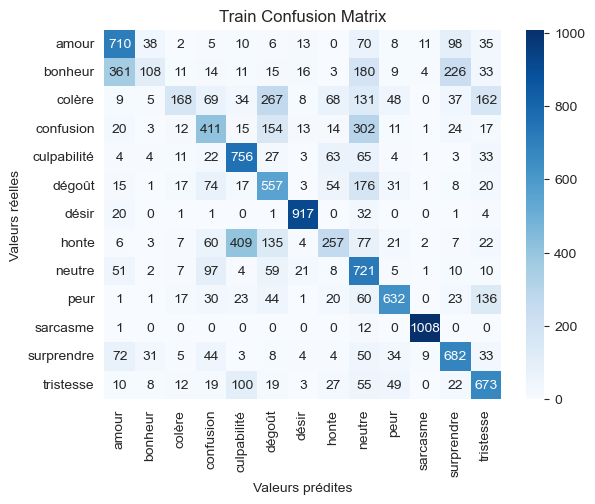

In [87]:
# Matrice de confusion train : 
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Train Confusion Matrix')
plt.show()

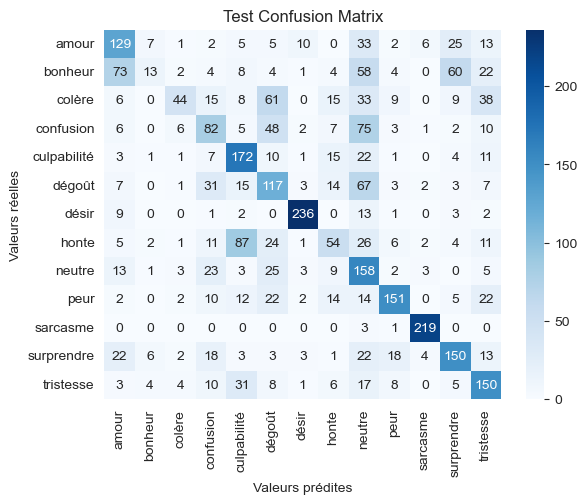

In [88]:
# Matrice de confusion test : 
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Test Confusion Matrix')
plt.show()

- Résultats :

In [89]:
duration = end_time - start_time

In [90]:
score_results = np.append(score_results, [[
  "Train",
  name_model,
  train_acc,
  train_precision,
  train_recall,
  train_f1,
  duration
]], axis=0)

score_results = np.append(score_results, [[
  "Test",
  name_model,
  test_acc,
  test_precision,
  test_recall,
  test_f1,
  duration
]], axis=0)

In [91]:
df_score_results = fn_score_results(score_results)
df_score_results.head(10)

,Type,Modele,Accuracy,Precision,Recall,F1-Score,Time
0,Train,BERT,45.81,0.47,0.46,0.43,898.86
1,Test,BERT,39.49,0.38,0.39,0.37,898.86
2,Train,ALBERT,13.21,0.11,0.13,0.08,698.78
3,Test,ALBERT,12.49,0.06,0.12,0.07,698.78
4,Train,RoBERTa,42.73,0.44,0.43,0.40,808.44
5,Test,RoBERTa,37.79,0.38,0.38,0.35,808.44
6,Train,CamemBERT,58.74,0.60,0.59,0.56,772.75
7,Test,CamemBERT,51.79,0.54,0.52,0.50,772.75


# <a id='toc3_'></a>[3) Résultats](#toc0_)

- Datas :

In [92]:
df_score_results = fn_score_results(score_results)
df_score_results.head(10)

,Type,Modele,Accuracy,Precision,Recall,F1-Score,Time
0,Train,BERT,45.81,0.47,0.46,0.43,898.86
1,Test,BERT,39.49,0.38,0.39,0.37,898.86
2,Train,ALBERT,13.21,0.11,0.13,0.08,698.78
3,Test,ALBERT,12.49,0.06,0.12,0.07,698.78
4,Train,RoBERTa,42.73,0.44,0.43,0.40,808.44
5,Test,RoBERTa,37.79,0.38,0.38,0.35,808.44
6,Train,CamemBERT,58.74,0.60,0.59,0.56,772.75
7,Test,CamemBERT,51.79,0.54,0.52,0.50,772.75


- Graphes :

In [93]:
# Métriques à afficher
cols_metriques = ["F1-Score", "Accuracy", "Precision", "Recall"]

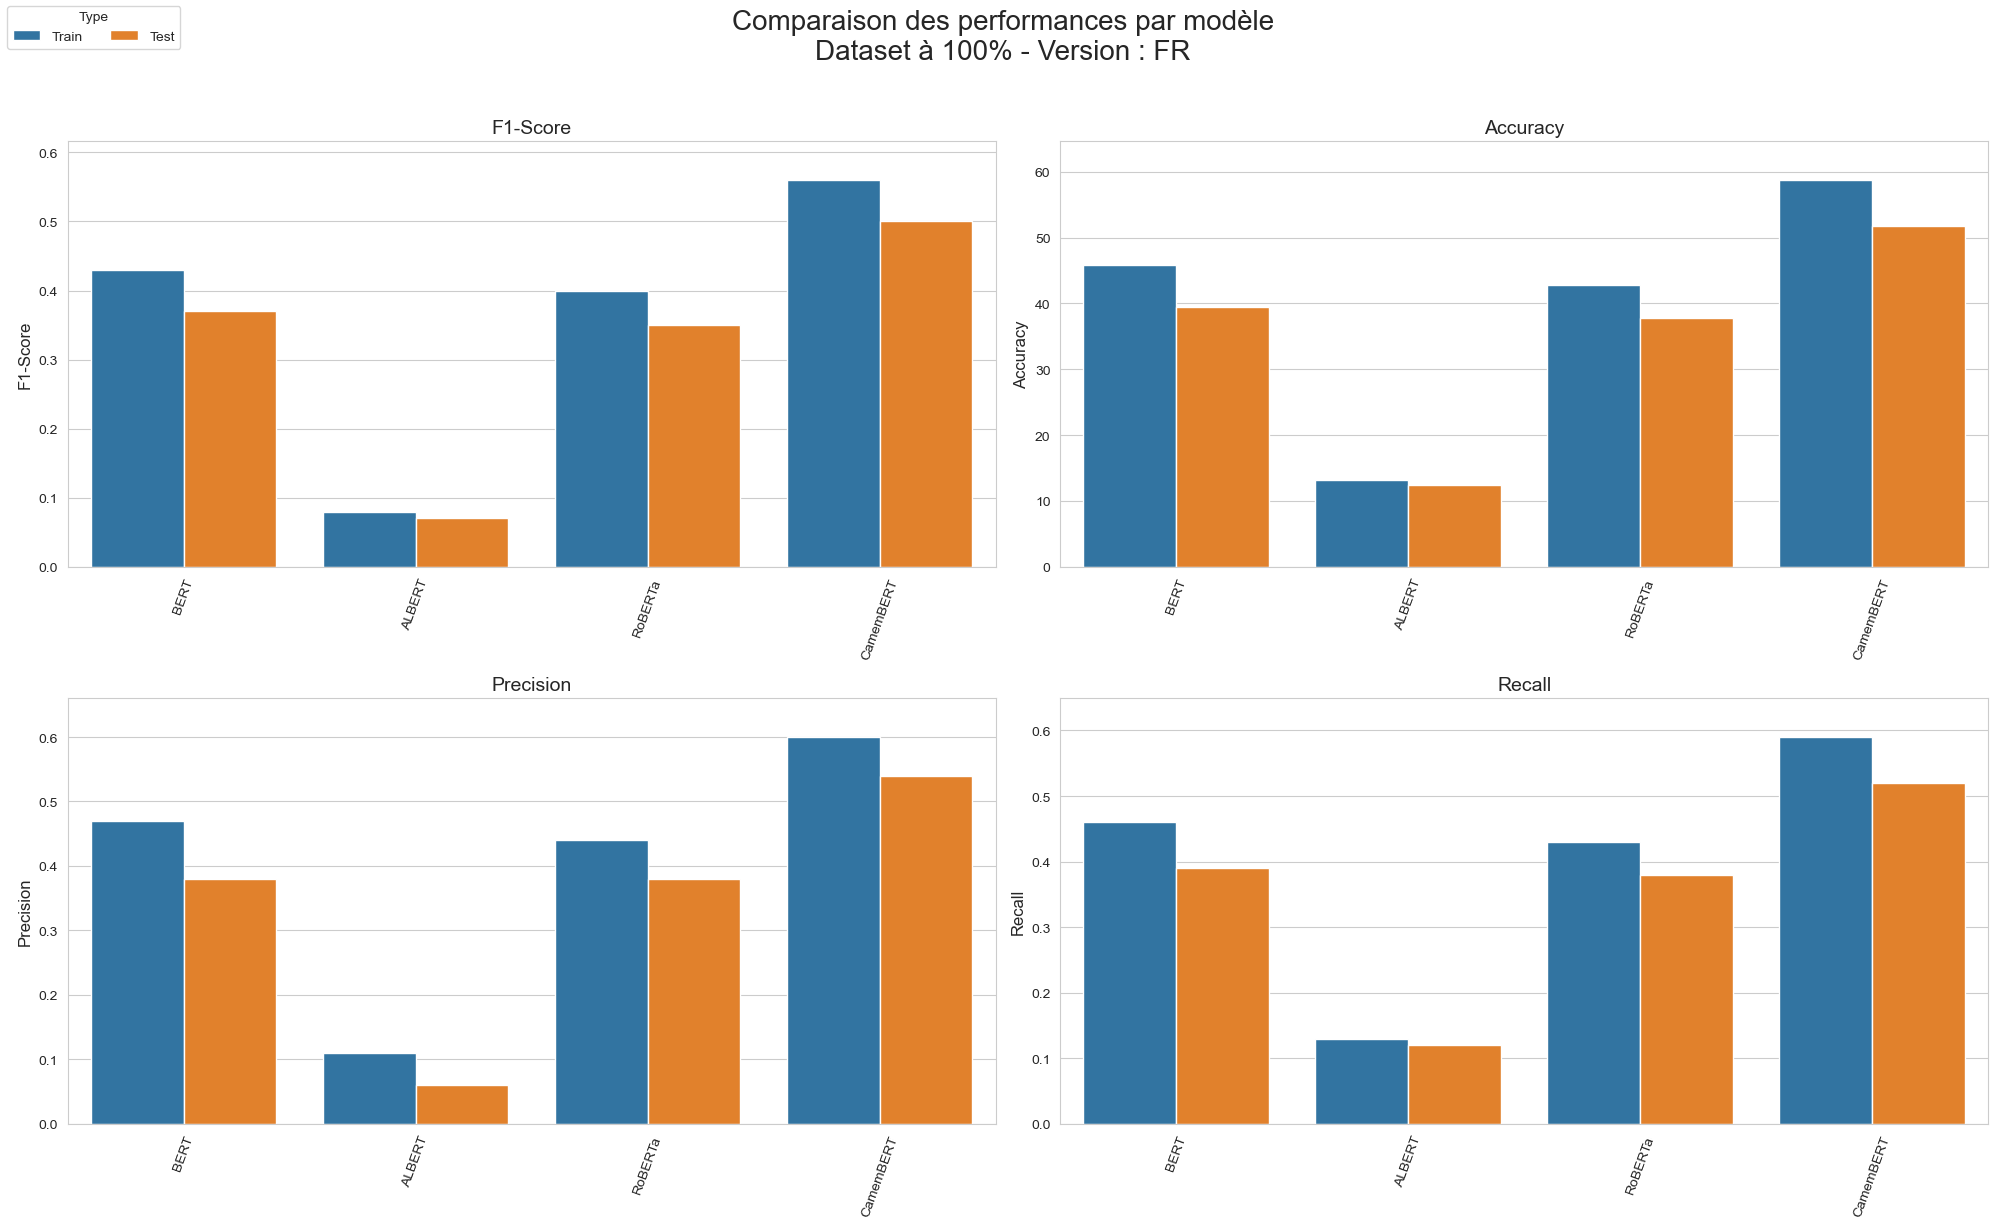

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

for i, metric in enumerate(cols_metriques):
    ax = axes[i]

    sns.barplot(
        data=df_score_results,
        x="Modele",
        y=metric,
        hue="Type",
        ax=ax
    )

    ax.set_title(
        f"{metric}",
        fontsize=14
    )

    ax.set_xlabel("", fontsize=12)
    ax.set_ylabel(metric, fontsize=12)

    ax.tick_params(axis="x", rotation=70)
    ax.set_ylim(0, df_score_results[metric].max() * 1.1)

    # Supprimer la légende locale (on en met une seule globale)
    ax.legend_.remove()

# Légende globale
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Type", loc="upper left", ncol=2)

fig.suptitle(f"Comparaison des performances par modèle\nDataset à {int(100*DATA_REDUCTION)}% - Version : {DATA_VERSION.upper()}", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

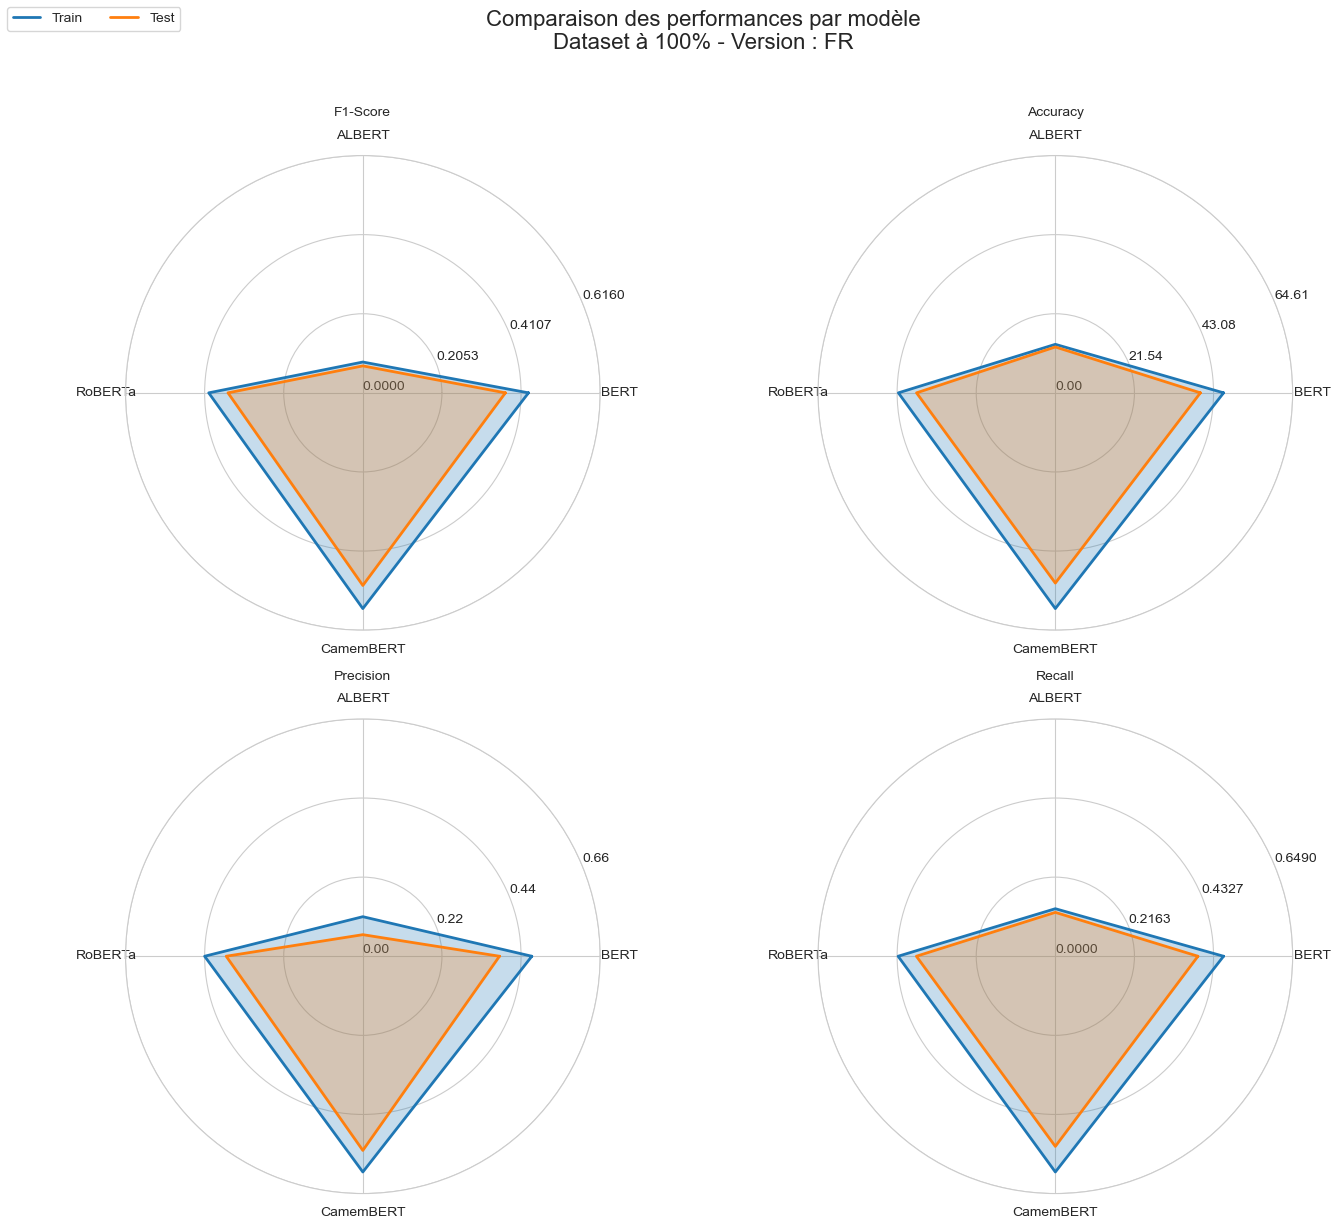

In [95]:
# Visualisation comparative :
# Modèles (labels)
labels = df_score_results["Modele"].unique().tolist()
N = len(labels)

# Angles du radar
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Figure 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 12), subplot_kw=dict(polar=True))
axes = axes.flatten()

for i, metric in enumerate(cols_metriques):
    ax = axes[i]

    # Scores Train
    scores_train = df_score_results[
        df_score_results["Type"] == "Train"
    ][metric].tolist()
    scores_train += scores_train[:1]

    # Scores Test
    scores_test = df_score_results[
        df_score_results["Type"] == "Test"
    ][metric].tolist()
    scores_test += scores_test[:1]

    max_val = max(max(scores_train), max(scores_test))
    upper = max_val * 1.1
    ax.set_ylim(0, upper)  # +10% de marge

    # Contrôle des interlignes
    ticks = np.linspace(0, upper, 4)  # 3 interlignes seulement
    ax.set_yticks(ticks)

    # Courbes
    ax.plot(angles, scores_train, linewidth=2, label="Train")
    ax.fill(angles, scores_train, alpha=0.25)

    ax.plot(angles, scores_test, linewidth=2, label="Test")
    ax.fill(angles, scores_test, alpha=0.25)

    # Mise en forme
    ax.set_title(
        f"{metric}",
        fontsize=10,
        pad=10
    )
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Légende globale
handles, labels_legend = axes[0].get_legend_handles_labels()
fig.legend(handles, labels_legend, loc="upper left", ncol=2)

fig.suptitle(f"Comparaison des performances par modèle\nDataset à {int(100*DATA_REDUCTION)}% - Version : {DATA_VERSION.upper()}", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


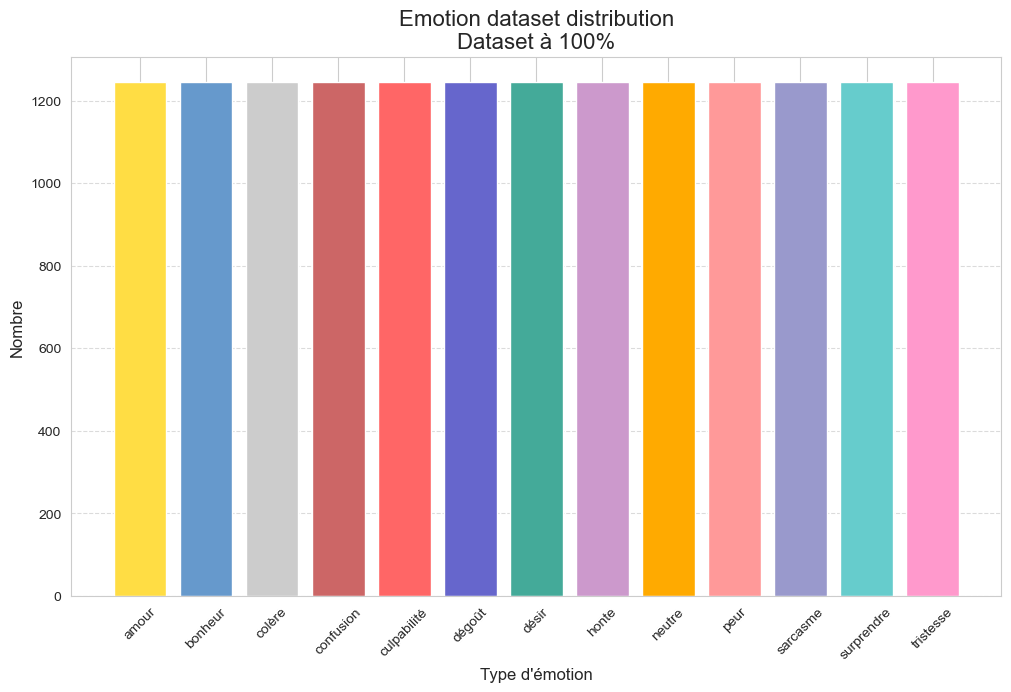

In [96]:
df_counts = df_data[col_emotion].value_counts()
tab_colors = ['#FFDD44', '#6699CC', '#CCCCCC', '#CC6666', '#FF6666', '#6666CC', '#44AA99', '#CC99CC', '#FFAA00', '#FF9999', '#9999CC', '#66CCCC', '#FF99CC']

plt.figure(figsize=(12, 7))
plt.bar(df_counts.index, df_counts.values, color=tab_colors)
plt.title(f"Emotion dataset distribution\nDataset à {int(100*DATA_REDUCTION)}%", fontsize=16)
plt.xlabel("Type d'émotion", fontsize=12)
plt.ylabel("Nombre", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## <a id='toc3_1_'></a>[Importance globale et locale](#toc0_)

In [97]:
from captum.attr import IntegratedGradients
import torch.nn.functional as F
from collections import defaultdict

- Importance locale :

In [98]:
def fn_forward_func_embeds(inputs_embeds, attention_mask, token_type_ids):
    outputs = camembert_model.l1(
        inputs_embeds=inputs_embeds,
        attention_mask=attention_mask,
        token_type_ids=token_type_ids
    )
    hidden_state = outputs[0]
    pooler = hidden_state[:, 0]
    pooler = camembert_model.pre_classifier(pooler)
    pooler = F.relu(pooler)
    pooler = camembert_model.dropout(pooler)
    logits = camembert_model.classifier(pooler)
    return logits


In [99]:
ig = IntegratedGradients(fn_forward_func_embeds)

In [100]:
# Importance LOCALE (une phrase)
def explain_sentence_local(model, tokenizer, text, max_len, device, target_class=None):
    model.eval()
    
    encoding = tokenizer(
        text,
        truncation=True,
        padding="max_length",
        max_length=max_len,
        return_tensors="pt"
    )

    input_ids = encoding["input_ids"].to(device)
    attention_mask = encoding["attention_mask"].to(device)
    token_type_ids = encoding.get("token_type_ids", torch.zeros_like(input_ids)).to(device)

    # prédiction
    with torch.no_grad():
        logits = model(input_ids, attention_mask, token_type_ids)
        probs = torch.softmax(logits, dim=1)
        pred_class = torch.argmax(probs, dim=1).item()
        pred_prob = probs[0, pred_class].item()

    if target_class is None:
        target_class = pred_class

    # ---- embeddings ----
    embeddings = model.l1.get_input_embeddings()(input_ids)

    baseline = torch.zeros_like(embeddings)

    attributions = ig.attribute(
        inputs=embeddings,
        baselines=baseline,
        additional_forward_args=(attention_mask, token_type_ids),
        target=target_class,
        n_steps=50
    )

    # importance par token
    token_attributions = attributions.sum(dim=-1).squeeze(0)
    token_attributions = token_attributions / torch.norm(token_attributions)

    tokens = tokenizer.convert_ids_to_tokens(input_ids.squeeze(0))

    return list(zip(tokens, token_attributions.detach().cpu().numpy())), pred_class, pred_prob

In [101]:
# df_data["label_encoded"], label_map = pd.factorize(df_data["emotion_fr"])
label_encoded_to_emotion = dict(zip(df_data["label_encoded"], df_data["emotion_fr"]))
label_encoded_to_emotion

{0: 'amour',
 1: 'bonheur',
 2: 'colère',
 3: 'confusion',
 4: 'culpabilité',
 5: 'dégoût',
 6: 'désir',
 7: 'honte',
 8: 'neutre',
 9: 'peur',
 10: 'sarcasme',
 11: 'surprendre',
 12: 'tristesse'}

In [102]:
# Exemple d'utilisation
text = "Je suis très heureux actuellement"

token_scores, pred, prob = explain_sentence_local(
    camembert_model,
    camembert_tokenizer,
    text,
    MAX_LEN,
    device
)

print(f"Classe prédite : {label_encoded_to_emotion[pred]} ({prob:.2%})")
print("-" * 40)

for tok, score in token_scores:
    if tok not in ["<pad>", "<s>", "</s>"]:
        print(f"{tok:15s} {score:.4f}")

Classe prédite : amour (34.87%)
----------------------------------------
▁Je             -0.0979
▁suis           0.0091
▁très           0.5753
▁heureux        0.7871
▁actuellement   -0.1914


In [115]:
# Heatmap sur le texte
from IPython.display import display, HTML
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

def visualize_token_importance(tokens, attributions, max_abs=True):
    """
    Affiche un texte avec les tokens colorés selon leur importance.
    tokens: liste de tokens
    attributions: score par token (float)
    max_abs: si True, on normalise par la valeur absolue max
    """

    # On ignore les tokens spéciaux
    tokens_clean = [t for t in tokens if t not in ["<pad>", "<s>", "</s>"]]
    attributions_clean = np.array([a for t, a in zip(tokens, attributions) if t not in ["<pad>", "<s>", "</s>"]])

    # Normalisation
    if max_abs:
        max_val = max(abs(attributions_clean.max()), abs(attributions_clean.min()))
        if max_val == 0:
            max_val = 1e-10
        attributions_clean = attributions_clean / max_val

    # Colormap rouge→vert
    cmap = cm.get_cmap("RdYlGn")

    html = ""
    for tok, score in zip(tokens_clean, attributions_clean):
        color = colors.rgb2hex(cmap(0.5 * (score + 1)))  # 0->1
        html += f'<span style="background-color:{color}; padding:2px; margin:1px">{tok}</span> '

    display(HTML(html))

text = "Je suis impatiente à l'idée de commencer mon nouveau job"

token_scores, pred_class, pred_prob = explain_sentence_local(
    camembert_model,
    camembert_tokenizer,
    text,
    MAX_LEN,
    device
)

tokens, scores = zip(*token_scores)

print(f"Classe prédite : {label_encoded_to_emotion[pred_class]} ({pred_prob:.2%})")

# Affichage heatmap
visualize_token_importance(tokens, scores)

Classe prédite : désir (70.38%)


Vert → contribution positive importante

Rouge → contribution faible ou négative

Les mots neutres seront jaunes (milieu de la colormap)

- Importance globale :

Objectif : trouver quels mots sont les plus importants en moyenne pour chaque classe sur tout le dataset.

Calculer Integrated Gradients pour beaucoup d’exemples

Regrouper par classe vraie (ou prédite)

Moyennner les attributions par token

Sortir le Top mots par classe

In [104]:
# Fonction attribution pour un batch
def compute_batch_attributions(model, batch):
    ids = batch['ids'].to(device)
    mask = batch['mask'].to(device)
    token_type_ids = batch['token_type_ids'].to(device)
    targets = batch['targets'].to(device, dtype=torch.long) 

    embeddings = model.l1.get_input_embeddings()(ids)
    baseline = torch.zeros_like(embeddings)

    attributions = ig.attribute(
        inputs=embeddings,
        baselines=baseline,
        additional_forward_args=(mask, token_type_ids),
        target=targets,
        n_steps=10
    )

    token_attr = attributions.sum(dim=-1)  # [B, seq_len]
    return token_attr.detach().cpu(), ids.cpu(), targets.cpu()

In [105]:
# Agrégation globale par classe
def global_importance_per_class(model, dataloader, tokenizer, id2label, max_batches=None):
    model.eval()

    class_token_scores = defaultdict(lambda: defaultdict(list))

    with torch.no_grad():
        pass

    for i, batch in enumerate(dataloader):
        if max_batches and i >= max_batches:
            break

        token_attr, ids, targets = compute_batch_attributions(model, batch)

        for b in range(ids.size(0)):
            tokens = tokenizer.convert_ids_to_tokens(ids[b])
            cls = targets[b].item()

            for tok, score in zip(tokens, token_attr[b]):
                if tok not in ["<pad>", "<s>", "</s>"]:
                    class_token_scores[cls][tok].append(score.item())

        # libération mémoire GPU sinon CUDA out of memory
        del token_attr, ids, targets
        torch.cuda.empty_cache()

    # moyenne par token
    class_token_mean = {}
    for cls in class_token_scores:
        class_token_mean[cls] = {
            tok: sum(vals) / len(vals)
            for tok, vals in class_token_scores[cls].items()
        }

    return class_token_mean

In [106]:
# Test
global_scores = global_importance_per_class(
    camembert_model,
    testing_loader,
    camembert_tokenizer,
    label_encoded_to_emotion,
    max_batches=10
)

In [117]:
# Top mots par classe
def print_top_tokens_per_class(global_scores, id2label, top_k=15):
    for cls, token_dict in global_scores.items():
        print("\n=======================")
        print(f"Classe {cls} — {id2label[cls]}")
        print("=======================")

        sorted_tokens = sorted(token_dict.items(), key=lambda x: abs(x[1]), reverse=True)

        for tok, score in sorted_tokens[:top_k]:
            print(f"{tok:15s} {score:.4f}")

In [118]:
print_top_tokens_per_class(global_scores, label_encoded_to_emotion, top_k=3)


Classe 2 — colère
▁me             0.1385
▁stressé        -0.1376
▁c              0.0672

Classe 4 — culpabilité
▁comment        1.0666
▁pu             0.9771
▁aurais         0.9502

Classe 11 — surprendre
▁curieux        0.7855
▁très           0.7801
▁attaché        0.6498

Classe 6 — désir
▁veux           0.4627
▁jai            0.3353
▁je             0.2519

Classe 0 — amour
▁chance         1.2725
▁belle          0.7229
▁rend           0.4214

Classe 8 — neutre
▁agréable       -0.8532
▁mépris         -0.7451
▁sent           -0.7056

Classe 5 — dégoût
▁dire           0.1337
▁pense          0.1327
▁quoi           0.1075

Classe 1 — bonheur
▁images         0.6793
▁entendre       0.6376
▁rire           0.6275

Classe 12 — tristesse
▁ressentir      1.3401
▁fardeau        1.2556
▁pression       0.8319

Classe 7 — honte
▁non            0.4071
▁mauvais        0.2007
▁ressemblait    0.1691

Classe 3 — confusion
▁colère         -0.3214
▁ai             0.2973
▁je             0.2468

Classe 9 — 